# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../lab1/archive/Amazon_Historical_StockPrice2.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400
...,...,...,...,...,...,...,...
1255,2021-03-22,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200
1256,2021-03-23,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300
1257,2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000
1258,2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500


In [4]:
df = df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [5]:
df

,Date,High
0,2016-03-28,584.750000
1,2016-03-29,595.849976
2,2016-03-30,603.239990
3,2016-03-31,600.750000
4,2016-04-01,599.030029
...,...,...
1255,2021-03-22,3126.580078
1256,2021-03-23,3182.000000
1257,2021-03-24,3160.310059
1258,2021-03-25,3109.780029


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index(['Date'])

In [7]:
df

,High
Date,
2016-03-28,584.750000
2016-03-29,595.849976
2016-03-30,603.239990
2016-03-31,600.750000
2016-04-01,599.030029
...,...
2021-03-22,3126.580078
2021-03-23,3182.000000
2021-03-24,3160.310059


In [8]:
df = df.groupby(pd.Grouper(freq='M')).max()

In [9]:
df

,High
Date,
2016-03-31,603.239990
2016-04-30,669.979980
2016-05-31,724.229980
2016-06-30,731.500000
2016-07-31,766.000000
...,...
2020-11-30,3366.800049
2020-12-31,3350.649902
2021-01-31,3363.889893


In [10]:
import matplotlib.pyplot as plt

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

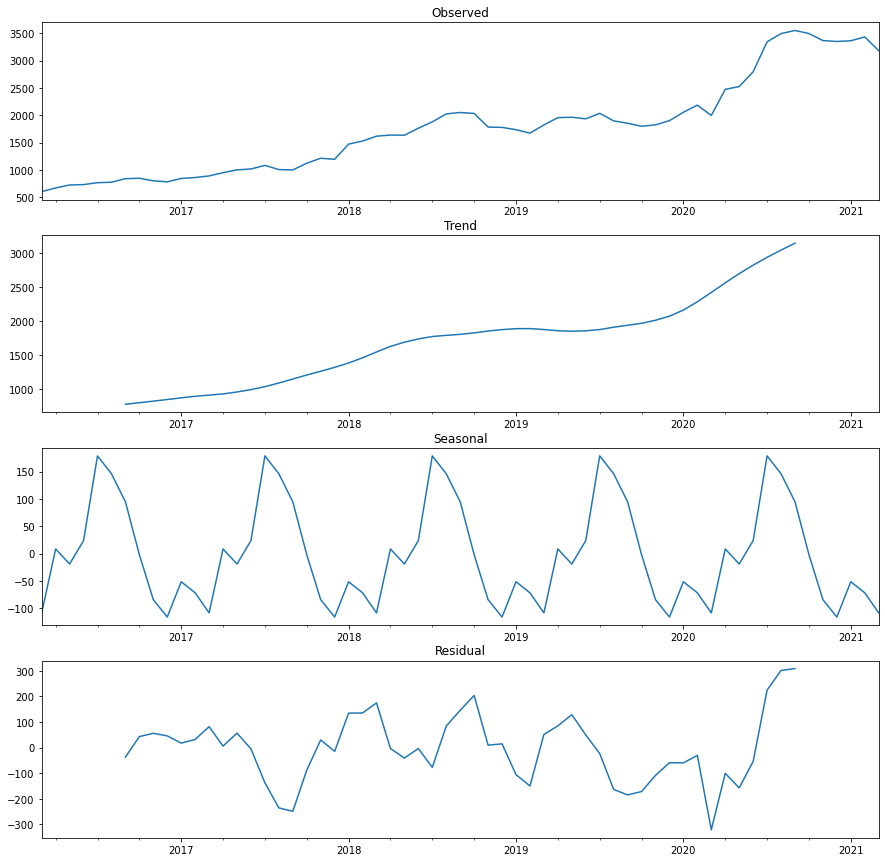

In [12]:
plt.figure(figsize=(15, 15))
decomposition = seasonal_decompose(df)

ax = plt.subplot(411)
ax.title.set_text('Observed')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.observed.plot(ax=ax)

ax = plt.subplot(412)
ax.title.set_text('Trend')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.trend.plot(ax=ax)

ax = plt.subplot(413)
ax.title.set_text('Seasonal')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.seasonal.plot(ax=ax)

ax = plt.subplot(414)
ax.title.set_text('Residual')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.resid.plot(ax=ax);

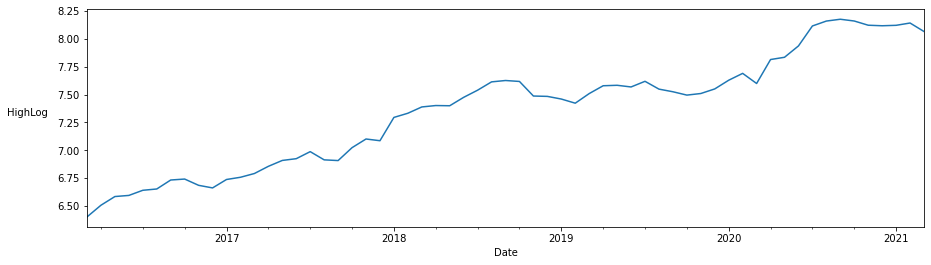

In [13]:
df['HighLog'] = np.log(df['High'])

plt.figure(figsize=(15, 4))
plt.ylabel('HighLog', rotation=0, labelpad=30)
df['HighLog'].plot();

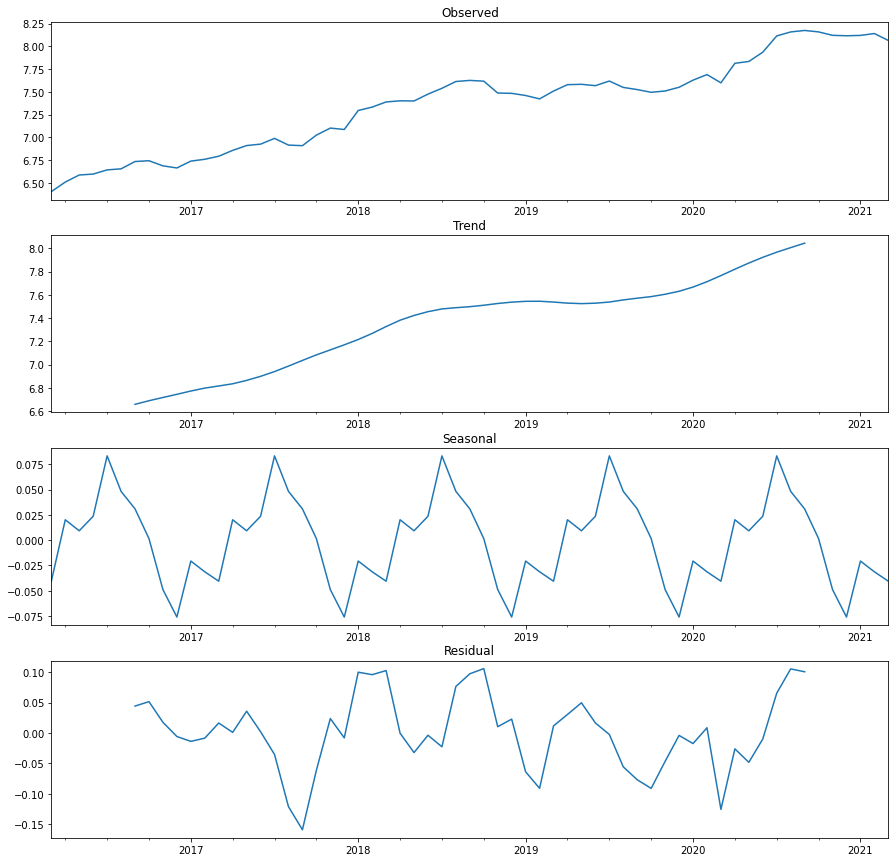

In [16]:
plt.figure(figsize=(15, 15))
decomposition = seasonal_decompose(df['HighLog'])

ax = plt.subplot(411)
ax.title.set_text('Observed')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.observed.plot(ax=ax)

ax = plt.subplot(412)
ax.title.set_text('Trend')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.trend.plot(ax=ax)

ax = plt.subplot(413)
ax.title.set_text('Seasonal')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.seasonal.plot(ax=ax)

ax = plt.subplot(414)
ax.title.set_text('Residual')
ax.axes.get_xaxis().get_label().set_visible(False)
decomposition.resid.plot(ax=ax);

Видим, что сезонность сохраняется

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

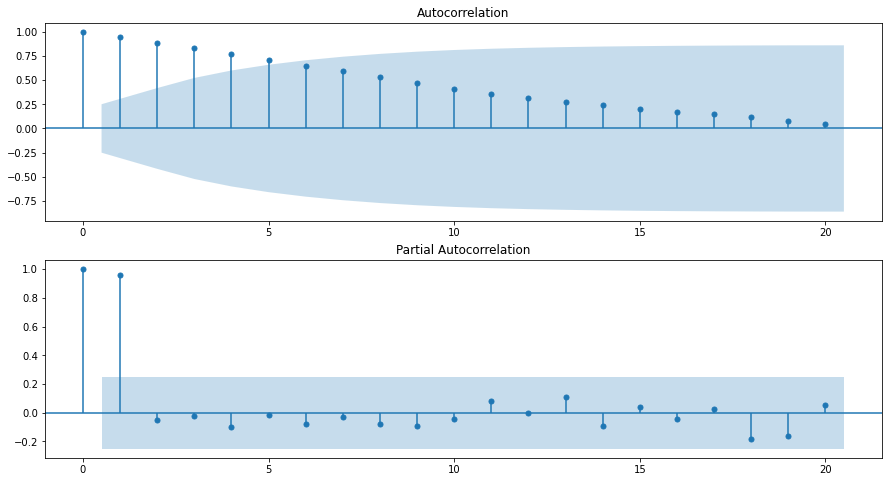

In [15]:
plt.figure(figsize=(15,8))

ax = plt.subplot(211)
plot_acf(df['HighLog'], lags=20, ax=ax)

ax = plt.subplot(212)
plot_pacf(df['HighLog'], lags=20, ax=ax);

Сезонное дифференцирование

In [24]:
from statsmodels.tsa.stattools import adfuller

0.0022789849968158347


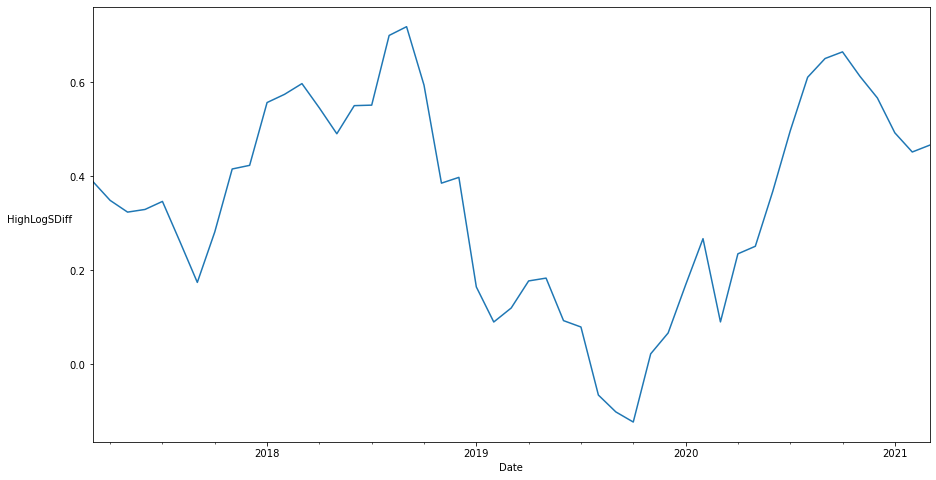

In [29]:
df['HighLogSDiff'] = df['HighLog'] - df['HighLog'].shift(12)
p_value = adfuller(df["HighLogSDiff"][12:])[1]
print(p_value)
# p_value < 0.05

plt.figure(figsize=(15, 8))
plt.ylabel('HighLogSDiff', rotation=0, labelpad=30)
df['HighLogSDiff'][12:].plot();

2.6047178289571783e-06


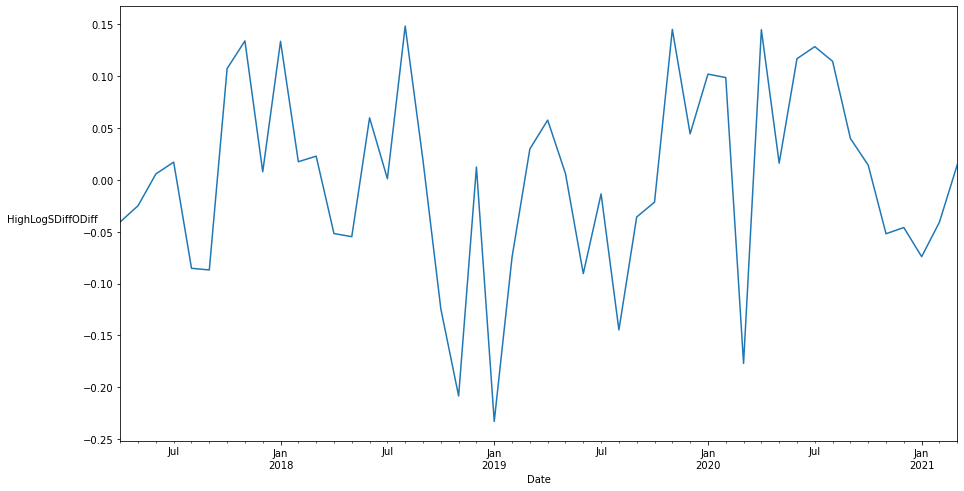

In [32]:
df['HighLogSDiffODiff'] = df['HighLogSDiff'] - df['HighLogSDiff'].shift(1)
p_value = adfuller(df["HighLogSDiffODiff"][13:])[1]
print(p_value)
# p_value < 0.05

plt.figure(figsize=(15, 8))
plt.ylabel('HighLogSDiffODiff', rotation=0, labelpad=30)
df['HighLogSDiffODiff'][13:].plot();

In [33]:
qs = range(6, 9)
Qs = range(1, 3)

ps = range(2, 5)
Ps = range(1, 4)

d= 1
D= 1

In [35]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [73]:
df

,High,HighLog,HighLogSDiff,HighLogSDiffODiff,Model
Date,,,,,
2016-03-31,603.239990,6.402315,NaN,NaN,1.000000
2016-04-30,669.979980,6.507248,NaN,NaN,603.239990
2016-05-31,724.229980,6.585109,NaN,NaN,669.979986
2016-06-30,731.500000,6.595097,NaN,NaN,724.229982
2016-07-31,766.000000,6.641182,NaN,NaN,731.500001
...,...,...,...,...,...
2020-11-30,3366.800049,8.121718,0.612553,-0.051988,3300.772539
2020-12-31,3350.649902,8.116910,0.566564,-0.045989,3366.015154
2021-01-31,3363.889893,8.120853,0.492472,-0.074092,3647.440240


In [74]:
df['HighLogSDiffODiff'].isna().sum()

13

In [96]:
df['HighLog'][13:51]

Date
2017-04-30    6.856030
2017-05-31    6.908955
2017-06-30    6.924612
2017-07-31    6.987777
2017-08-31    6.914135
2017-09-30    6.907755
2017-10-31    7.023572
2017-11-30    7.101190
2017-12-31    7.085717
2018-01-31    7.294771
2018-02-28    7.332173
2018-03-31    7.388662
2018-04-30    7.401292
2018-05-31    7.399398
2018-06-30    7.474829
2018-07-31    7.539054
2018-08-31    7.613606
2018-09-30    7.625839
2018-10-31    7.617361
2018-11-30    7.486613
2018-12-31    7.483436
2019-01-31    7.459575
2019-02-28    7.422410
2019-03-31    7.508650
2019-04-30    7.578831
2019-05-31    7.582942
2019-06-30    7.567966
2019-07-31    7.618644
2019-08-31    7.548514
2019-09-30    7.524917
2019-10-31    7.494903
2019-11-30    7.509165
2019-12-31    7.550346
2020-01-31    7.628381
2020-02-29    7.689806
2020-03-31    7.599066
2020-04-30    7.813996
2020-05-31    7.834175
Freq: M, Name: HighLog, dtype: float64

In [85]:
%%time
#warnings.filterwarnings('ignore')
import statsmodels.api as sm
from tqdm import tqdm

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df['HighLog'][:51], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], 12)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|          | 0/54 [00:00<?, ?it/s]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▏         | 1/54 [00:00<00:39,  1.33it/s]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  4%|▎         | 2/54 [00:01<00:51,  1.02it/s]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed

 54%|█████▎    | 29/54 [00:45<00:40,  1.62s/it]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 56%|█████▌    | 30/54 [00:47<00:43,  1.81s/it]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 57%|█████▋    | 31/54 [00:48<00:36,  1.58s/it]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 59%|█████▉    | 32/54 [00:50<00:35,  1.60s/it]/Users/maria/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

CPU times: user 2min 54s, sys: 1.07 s, total: 2min 55s
Wall time: 1min 32s


In [86]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters        aic
0   (2, 6, 1, 1) -71.130582
6   (2, 7, 1, 1) -71.006056
12  (2, 8, 1, 1) -70.195393
7   (2, 7, 1, 2) -69.145109
8   (2, 7, 2, 1) -68.981589


In [87]:
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              HighLog   No. Observations:                   51
Model:             SARIMAX(2, 1, 6)x(1, 1, [1], 12)   Log Likelihood                  46.565
Date:                              Tue, 26 Oct 2021   AIC                            -71.131
Time:                                      16:15:29   BIC                            -53.117
Sample:                                  03-31-2016   HQIC                           -64.722
                                       - 05-31-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3190      0.222      5.945      0.000       0.884       1.754
ar.L2         -0.78

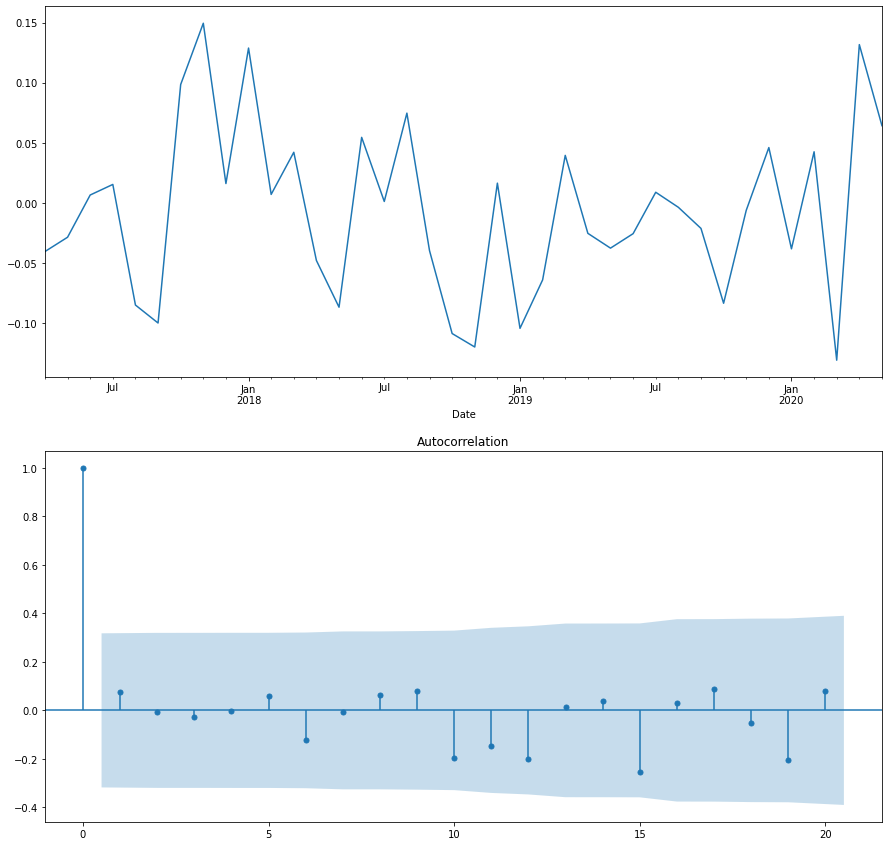

In [88]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[13:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax);

In [90]:
print(df.shape)
df.tail()

(61, 5)


,High,HighLog,HighLogSDiff,HighLogSDiffODiff,Model
Date,,,,,
2020-11-30,3366.800049,8.121718,0.612553,-0.051988,NaN
2020-12-31,3350.649902,8.116910,0.566564,-0.045989,NaN
2021-01-31,3363.889893,8.120853,0.492472,-0.074092,NaN
2021-02-28,3434.000000,8.141481,0.451675,-0.040797,NaN
2021-03-31,3182.000000,8.065265,0.466199,0.014524,NaN


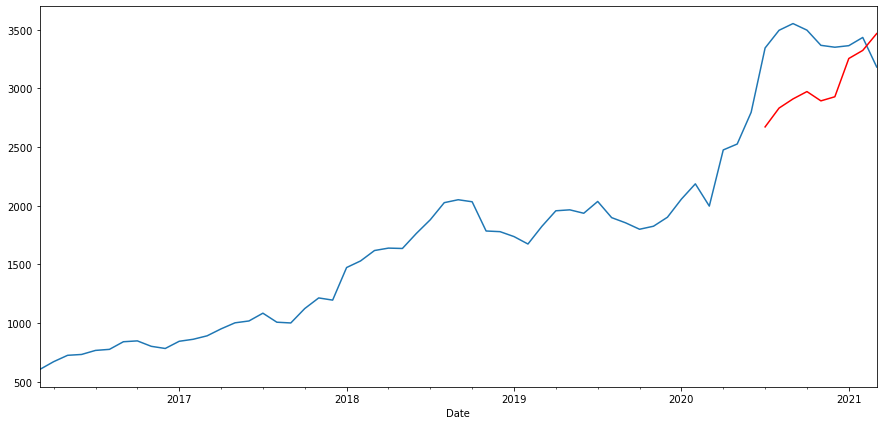

In [97]:
df['Model'] = np.exp(best_model.predict(start=52, end=61))

plt.figure(figsize=(15,7))
df['High'].plot()
df['Model'].plot(c='r');

In [71]:
from sklearn.metrics import mean_absolute_percentage_error

In [104]:
mean_absolute_percentage_error(df['High'][52:], df['Model'][52:])

0.1269419643696066